In [1]:
from keras.applications.resnet50 import ResNet50
# from keras.applications.VGG16 import VGG16
from keras.preprocessing import image
from keras.models import Model
from keras.layers import Dense, GlobalAveragePooling2D
import matplotlib.pyplot as plt
import h5py
from keras.applications.resnet50 import preprocess_input, decode_predictions
import numpy as np


Using TensorFlow backend.


In [2]:
import scipy.io
labelMat = scipy.io.loadmat('utils/imagelabels.mat')
split_mat = scipy.io.loadmat('utils/setid.mat')
#distancemap = scipy.io.loadmat('distancematrices17.mat')
train_split = split_mat['trnid'][:, :]
labels = labelMat['labels']
nr_labels = max(max(labels))
print('#labels',nr_labels)
print(train_split)
print(train_split.shape)
print(labelMat['labels'][0, train_split[0, :]])
print()
# f = h5py.File('datasplits.mat','r') 
# data = f.get('data/variable1') 

#labels 102
[[6765 6755 6768 ... 8026 8036 8041]]
(1, 1020)
[  1   1   1 ... 102 102 102]



In [3]:

base_model = ResNet50(weights='imagenet', include_top=False)

# add a global spatial average pooling layer
x = base_model.output
x = GlobalAveragePooling2D()(x)
# let's add a fully-connected layer
x = Dense(1024, activation='relu')(x)
# and a logistic layer -- let's say we have 200 classes
predictions = Dense(nr_labels, activation='linear')(x)

# this is the model we will train
model = Model(inputs=base_model.input, outputs=predictions)

Instructions for updating:
Colocations handled automatically by placer.


/home/axel/kamai/flower-image-classification/venv/lib/python3.7/site-packages/keras_applications/resnet50.py:265: UserWarning: The output shape of `ResNet50(include_top=False)` has been changed since Keras 2.2.0.
  warnings.warn('The output shape of `ResNet50(include_top=False)` '


1
6765


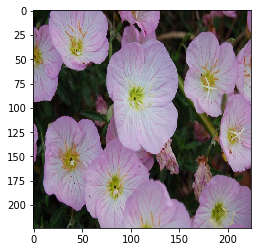

1
6755


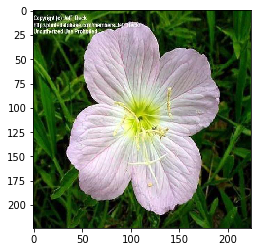

1
6768


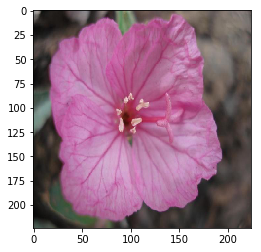

1
6736


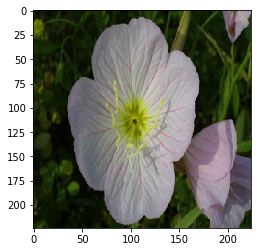

1
6744


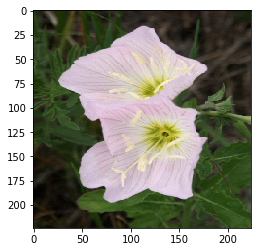

1
6766


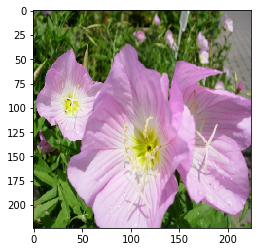

1
6771


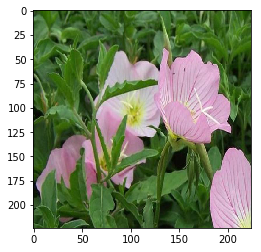

1
6750


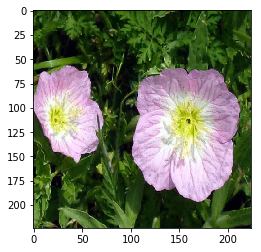

1
6741


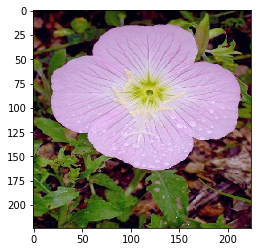

1
6762


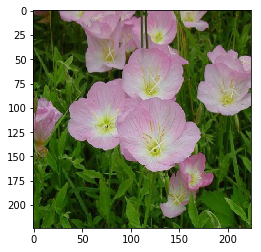

In [4]:
for i in train_split[0, :10]:
    img_path = './data/102flowers/image_' + '{:05}'.format(i) + '.jpg'
    label = labelMat['labels'][0,i]
    img = image.load_img(img_path, target_size=(224, 224))

    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    x = preprocess_input(x)
    
    plt.imshow(img)
    print(label)
    print(i)
    plt.show()
    
    

In [ ]:
x = x

y = np.zeros((1, nr_labels))
y[0, label] = 1
print(x.shape)
print(y.shape)
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['accuracy'])

model.fit(x, y, epochs=2)

(1, 224, 224, 3)
(1, 102)
Epoch 1/10


In [6]:
#img_path = './data/102flowers/image_00001.jpg'
#img = image.load_img(img_path, target_size=(224, 224))

#x = image.img_to_array(img)
#x = np.expand_dims(x, axis=0)
#x = preprocess_input(x)

preds = model.predict(x)
# decode the results into a list of tuples (class, description, probability)
# (one such list for each sample in the batch)
print('predicted', preds.argmax())
print('actual', label)
# print('Predicted:', decode_predictions(preds, top=3)[0])


predicted 24
actual 1
